# Fundamental geometric operations for B-Splines

In [1]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt

Having more control on a curve, adding new control points, can be done in two different ways:

1. insert new knots

2. elevate the polynomial degree

In general, one way need to use both approaches.
For each strategy, we shall consider one algorithm.

## Knot insertion

Assuming an initial B-Spline curve defined by:

* its degree $p$
* knot vector $T=(t_i)_{0\leqslant i \leqslant n + p + 1}$
* control points $(\mathbf{P}_i)_{ 0 \leqslant i \leqslant n}$

We are interested in the new B-Spline curve as the result of the insertion of the knot $t$, $m$ times (with a span $j$, i.e. $t_j \leqslant t < t_{j+1}$).

After such operation, the degree is remain unchanged, while the knot vector is enriched by $t$, $m$ times. The aim is then to compute the new control points $(\mathbf{Q}_i)_{ 0 \leqslant i \leqslant n + m}$

For this purpose we use the DeBoor algorithm:

\begin{align}
   n &:= n+m
   \\
   p &:= p
   \\
   T &:= \{ t_0,.., t_j, \underbrace{t, ..., t}_{m}, t_{j+1},.., t_{n+k}\}
   \\
   \textbf{Q}_i &:= \textbf{Q}_i^{m}
\end{align}

where
\begin{align}
   \textbf{Q}_i^0 &= \textbf{P}_i
   \\
   \textbf{Q}_i^r &= \alpha_i^r \textbf{Q}_i^{r-1} + (1-\alpha_i^r) \textbf{Q}_{i-1}^{r-1}
\end{align}
with
\begin{align}
   \alpha_i^r &= 
      \left\{\begin{array}{cc}
         1 &  i \leqslant j-p+r-1 \\
         \frac{t-t_i}{t_{i+p-r+1}-t_i} & j-p+r \leqslant i \leqslant j-m \\
         0 & j-m+1 \leqslant i 
      \end{array}\right.   
\end{align}

The following python function implements the previous algorithm. 

In [2]:
# import the knot insertion function
from bsplines_utilities import curve_insert_knot

From now on, we shall also use the following function to plot curves and their control points:

In [3]:
from bsplines_utilities import plot_curve

**Examples**

In [4]:
def example_1(times=1):
    knots  = [0., 0., 0., 0., 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]
    plot_curve(knots, degree, P, with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')    

    t = 0.5
    knots, degree, P = curve_insert_knot(knots, degree, P, t, times=times)
    plot_curve(knots, degree, P, color='r', label='Q', with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    n = len(knots) - degree - 1
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{Q}_{' + str(i) + '}$')    
     
    # plot endpoints
    for i in [0, n-1]:
        x = P[i,0] ; y = P[i,1]
        if i == 0:
            Pi = '\mathbf{P}_{' + str(i) + '}'
        elif i == n-1:
            Pi = '\mathbf{P}_{' + str(i-1) + '}'
            
        Qi = '\mathbf{Q}_{' + str(i) + '}'
        text = '${Pi} = {Qi}$'.format(Pi=Pi, Qi=Qi)
        plt.text(x+0.05,y+0.05,text)     

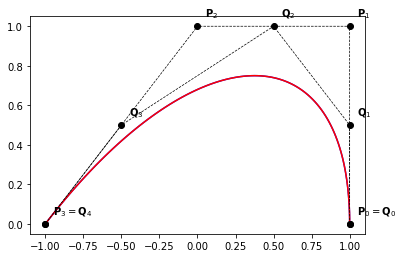

In [5]:
example_1(times=1)

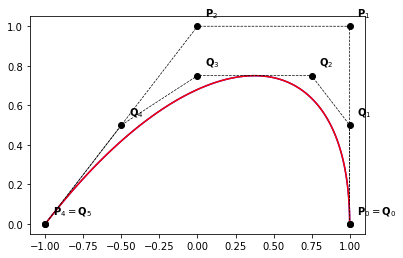

In [6]:
example_1(times=2)

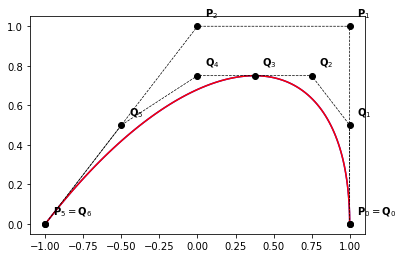

In [7]:
example_1(times=3)

In [8]:
def example_2a(nt = 3):
    knots  = [0., 0., 0., 0., 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]
    plot_curve(knots, degree, P, with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')    

    ts = np.linspace(0., 1., nt+2)[1:-1]
    for t in ts:
        knots, degree, P = curve_insert_knot(knots, degree, P, t, times=1)
        
    plot_curve(knots, degree, P, color='r', label='Q', with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    n = len(knots) - degree - 1
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{Q}_{' + str(i) + '}$')    
     
    # plot endpoints
    for i in [0, n-1]:
        x = P[i,0] ; y = P[i,1]
        if i == 0:
            Pi = '\mathbf{P}_{' + str(i) + '}'
        elif i == n-1:
            Pi = '\mathbf{P}_{' + str(i-1) + '}'
            
        Qi = '\mathbf{Q}_{' + str(i) + '}'
        text = '${Pi} = {Qi}$'.format(Pi=Pi, Qi=Qi)
        plt.text(x+0.05,y+0.05,text)     

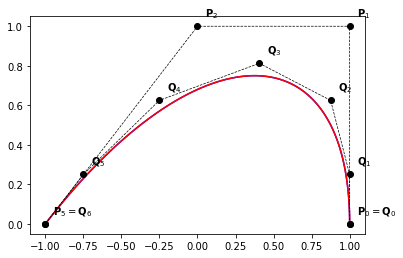

In [9]:
# curve after inserting [0.25 0.5  0.75]
example_2a(nt=3) 

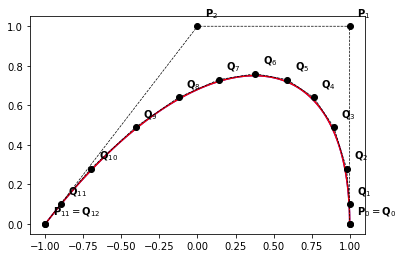

In [10]:
# curve after inserting [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
example_2a(nt=9) 

## Order elevation

There are also many algorithms for degree elevation of a B-Spline curve. In the sequel, we will be using the one developped by Huand, Hu and Martin (2005).

The previous algorithm is implemented by the following function

In [11]:
# import the degree elevation function
from bsplines_utilities import curve_elevate_degree

**Example 1.**

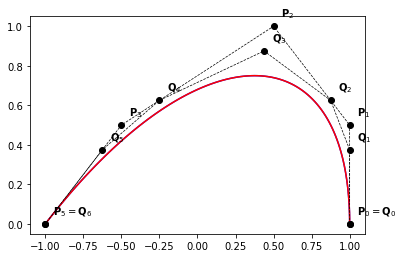

In [12]:
def example_1(m=1):
    knots  = [0., 0., 0., 0., 0.5, 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., .5, -.5, -1.]
    P[:, 1] = [0., .5, 1.,  .5,  0.]

    plot_curve(knots, degree, P, with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')    
    
    knots, degree, P = curve_elevate_degree(knots, degree, P, m=1)
    plot_curve(knots, degree, P, color='r', label='Q', with_ctrl_pts=False)
        
    # we don't plot the first and last points
    # they will be plotted later
    n = len(knots) - degree - 1
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{Q}_{' + str(i) + '}$')    

    # plot endpoints
    for i in [0, n-1]:
        x = P[i,0] ; y = P[i,1]
        if i == 0:
            Pi = '\mathbf{P}_{' + str(i) + '}'
        elif i == n-1:
            Pi = '\mathbf{P}_{' + str(i-1) + '}'
            
        Qi = '\mathbf{Q}_{' + str(i) + '}'
        text = '${Pi} = {Qi}$'.format(Pi=Pi, Qi=Qi)
        plt.text(x+0.05,y+0.05,text)     
    
example_1()

**Example 2.**

In [13]:
def example_2(m=1):
    knots  = [0., 0., 0., 0., 0.5, 0.5, 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1
    n_initial = n

    P = np.zeros((n, 2))
    P[:, 0] = [260., 100., 260., 420., 580., 420.]
    P[:, 1] = [100., 260., 420., 420., 260., 100.]
    plot_curve(knots, degree, P, with_ctrl_pts=False)
    
    # we don't plot the first and last points
    # they will be plotted later
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')        

    knots, degree, P = curve_elevate_degree(knots, degree, P, m=m)
    plot_curve(knots, degree, P, color='r', label='Q', with_ctrl_pts=False)    
        
    # we don't plot the first and last points
    # they will be plotted later
    n = len(knots) - degree - 1
    for i in range(1, n-1):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{Q}_{' + str(i) + '}$')    

    # plot endpoints
    for i in [0, n-1]:
        x = P[i,0] ; y = P[i,1]
        if i == 0:
            Pi = '\mathbf{P}_{' + str(i) + '}'
        elif i == n-1:
            Pi = '\mathbf{P}_{' + str(n_initial-1) + '}'
            
        Qi = '\mathbf{Q}_{' + str(i) + '}'
        text = '${Pi} = {Qi}$'.format(Pi=Pi, Qi=Qi)
        plt.text(x+0.05,y+0.05,text)         

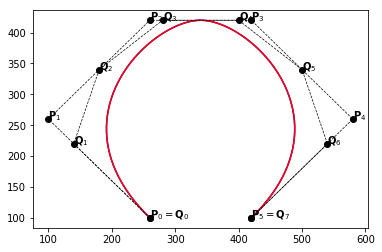

In [14]:
example_2(m=1)

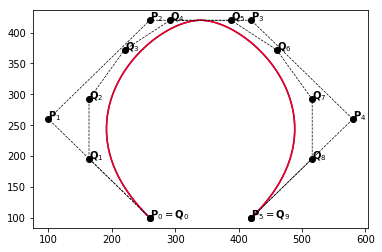

In [15]:
example_2(m=2)

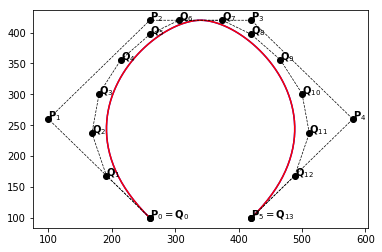

In [16]:
example_2(m=4)

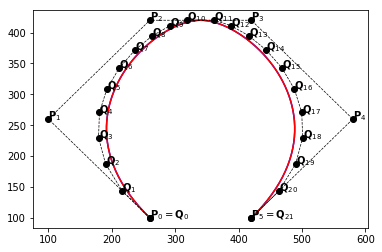

In [17]:
example_2(m=8)

## Translation

Since B-Spline curves are invariant under affine transformations, whan translating a curve with a given displacement, the new curve has the same knot vector while the control points are obtained by applying the same translation to the initial ones.

The following function implements this utility

In [18]:
# import the translation of a B-Spline curve
from bsplines_utilities import translate_curve

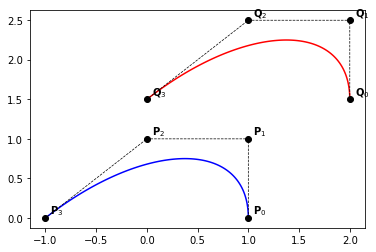

In [19]:
def example_1():
    knots  = [0., 0., 0., 0., 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]
    plot_curve(knots, degree, P)
    
    knots, P = translate_curve(knots, P, [1., 1.5])
    plot_curve(knots, degree, P, color='r', label='Q')
    
example_1()    

## Rotation

Rotating a B-Spline curve with an angle $\theta$ is done by applying it on the control points, as for the translation algorithm.

The following function implements this utility.

In [20]:
# import the rotation of a B-Spline curve
from bsplines_utilities import rotate_curve

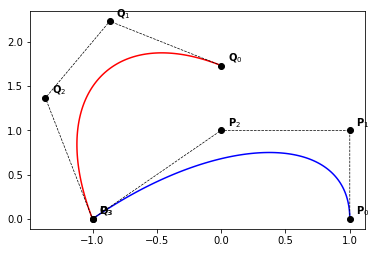

In [21]:
def example_1():
    knots  = [0., 0., 0., 0., 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]
    plot_curve(knots, degree, P)
    
    knots, P = rotate_curve(knots, P, np.pi/3., center=[-1.,0.])
    plot_curve(knots, degree, P, color='r', label='Q')
    
example_1() 

## Homothetic transformation

The following function implements a hmothetic transformation for B-Spline curves.

In [22]:
# import the homothetic transformation of a B-Spline curve
from bsplines_utilities import homothetic_curve

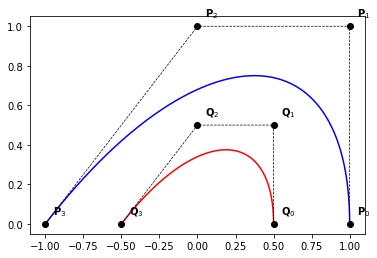

In [23]:
def example_1():
    knots  = [0., 0., 0., 0., 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1

    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]
    plot_curve(knots, degree, P)
    
    knots, P = homothetic_curve(knots, P, 0.5, center=[0.,0.])
    plot_curve(knots, degree, P, color='r', label='Q')
    
example_1() 

In [24]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()